In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_positives_ratio(sampled_fccs: np.ndarray):
    result = np.sum(sampled_fccs > 0, axis=2)
    result = result / sampled_fccs.shape[2]
    return result


def plot_fccs_signs(df: pd.DataFrame):
    sns.heatmap(round(df, 2) * 100, cmap='RdBu_r', annot=False,
                annot_kws={"size": 6}, vmin=0, vmax=100, linewidths=0.05,
                cbar_kws={'format': '%.0f%%'})


In [2]:
from src.util.io import load_sampled_fccs, load_reference_fccs

sampled_fcc_komkova = load_sampled_fccs('../../../data/mc/mc_komkova.mat')
ref_fcc_komkova = load_reference_fccs('../../../data/fcc/ref_fccs_komkova.txt')

sampled_fcc_shestov = load_sampled_fccs('../../../data/mc/mc_shestov.mat')
ref_fcc_shestov = load_reference_fccs('../../../data/fcc/ref_fcc_shestov.txt')


## Fig. S4 Probabilistic sign distribution of FCCs in the ensemble of GEM-embedded models.

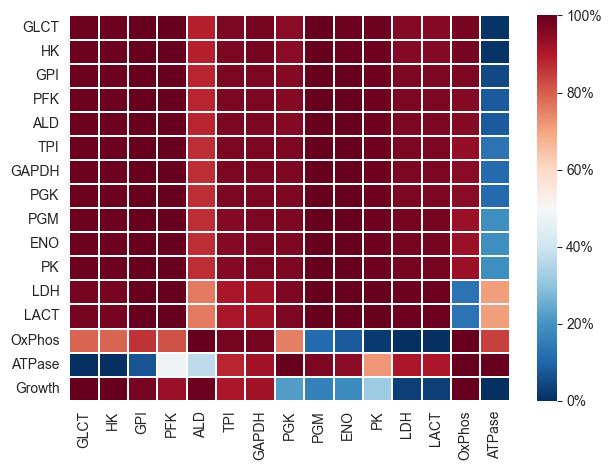

In [3]:
from util.fcc import exclude_reactions

exclude_rxns = ['AK', 'OXYT']
selected_fcc_samples_komkova, rxn_ids = exclude_reactions(sampled_fcc_komkova, ref_fcc_komkova.index, exclude_rxns)

fccs_signs_komkova = calculate_positives_ratio(selected_fcc_samples_komkova)

causes = ref_fcc_komkova.columns.drop(['AK', 'OXYT', 'Growth'])
fccs_signs_komkova_df = pd.DataFrame(fccs_signs_komkova, columns=rxn_ids, index=rxn_ids)
plot_fccs_signs(fccs_signs_komkova_df.loc[:, causes])

plt.tight_layout()
path = '../../../out/fccs_signs_komkova'
plt.savefig(path, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()


## Fig. S5 Probabilistic sign distribution of FCCs in the ensemble of the Shestov-derived models.

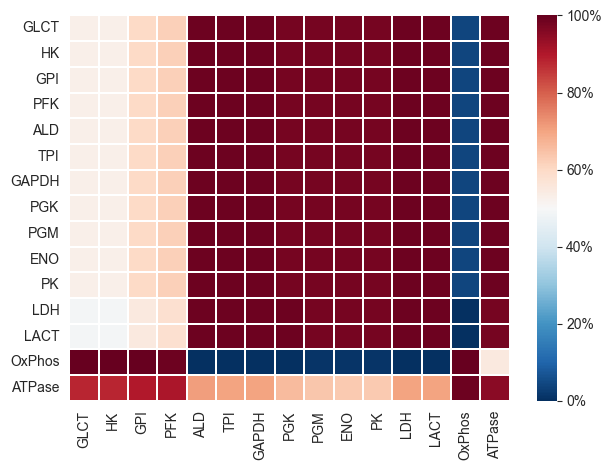

In [4]:
selected_fcc_samples_shestov, rxn_ids = exclude_reactions(sampled_fcc_shestov, ref_fcc_shestov.index, exclude_rxns)

fccs_signs_shestov = calculate_positives_ratio(selected_fcc_samples_shestov)
fccs_signs_shestov_df = pd.DataFrame(fccs_signs_shestov, columns=rxn_ids, index=rxn_ids)

plot_fccs_signs(fccs_signs_shestov_df)
plt.tight_layout()

path = '../../../out/fccs_signs_shestov'
plt.savefig(path, bbox_inches='tight', pad_inches=0, transparent=True)

plt.show()
